<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Computer_Vision_Classification_%20Sequential_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision
### Image Classification using Sequential Neural Network
### Keras Dataset: Mnist

# Introduction

Keras Mnist dataset has 70000 images of hand written digits (0 - 9) which have been captured in color. The objective of this machine learning program was to create a sequential neural network from scratch which can correctly classify the digits with high accuracy. 


### Methodology
The following optimization variables were scanned to identify the optimal fit:
+ Optimizer: RMSProp, Adam
+ Loss: Mean Absolute Error (MAE), Mean Square Error (MSE)
+ Architecture: Number of layers
+ Architecture: Number of nodes per layer
+ Number of Epochs

| Model # | Optimizer | Loss | Epochs | Layers | Layer 1 | Layer 2 | Layer 3 | Layer 4 | Layer 5 | Layer 6 | Change | Error: Train | Error: Test | Time/step | Improvement |
| --- | --- | --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  --- |  
| 1 | RMSProp | MSE | 20 | 3 | 4 | 8 | 10 | | | | Base | 0.0345 | 0.0335 | 21us | - |
| 2 | Adam | MSE | 20 | 3 | 4 | 8 | 10 | | | | Optimizer | 0.0334 | 0.0341 | 20us | No | 
| 3 | RMSProp | MAE | 20 | 3 | 4 | 8 | 10 | | | | Loss | 0.0506 | 0.0509 | 23us | No | 
| 4 | Adam | MAE | 20 | 3 | 4 | 8 | 10 | | | | Optimizer, Loss |  0.0838 | 0.0839 | 24us | No |
| 5 | RMSProp | MSE | 20 | 4 | 4 | 8 | 8 | 10 | | | Layers | 0.0321 | 0.0322 | 21us | Yes | 
| 6 | RMSProp | MSE | 20 | 5 | 4 | 8 | 8 | 8 | 10 | | Layers | 0.0393 | 0.0406 | 23us | No |
| 7 | RMSProp | MSE | 20 | 4 | 4 | 16 | 16 | 10 | | | Nodes | 0.0295 | 0.0298 | 22us | Yes |
| 8 | RMSProp | MSE | 20 | 4 | 4 | 32 | 32 | 10 | | | Nodes | 0.0324 | 0.0325 | 22us | No | 
| 9 | RMSProp | MSE | 40 | 4 | 4 | 16 | 16 | 10 | | | Epochs | 0.0295 | 0.0300 | 21us | No |
| 10 | RMSProp | MSE | 30 | 4 | 4 | 16 | 16 | 10 | | | Epochs | 0.0313 | 0.0333 | 22us | No |


### Conclusion
Based on the above analysis, the optimal parameters were identified as:
+ Optimizer: RMSProp
+ Loss function: MSE
+ Number of layers: 4
+ Nodes per layer: 4, 4, 16, and 16
+ Number of epochs: 20

In [0]:
! pip install Keras
! pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /opt/anaconda3/lib/python3.7/site-packages (2.0.0)


Using TensorFlow backend.


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


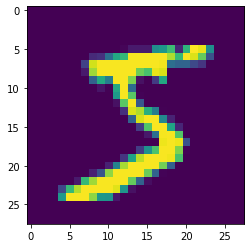

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) =  mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

plt.imshow(x_train[0])

### Test Train split

In [0]:
h1, w1, c1 = x_train.shape
print(h1, w1, c1)
x_train_flat = x_train.reshape(h1, w1*c1)

h2, w2, c2 = x_test.shape
print(h2, w2, c2)
x_test_flat = x_test.reshape(h2, w2*c2)
print("X:", x_train_flat.shape, x_test_flat.shape)

60000 28 28
10000 28 28
X: (60000, 784) (10000, 784)


### Convert class vectors to binary class matrices

The output vectors (y_train, y_test) have all the digits encoded as 0, 1, ... 9. In order for the neural network to recognize them as different values, a matrix would need to be created to convert them:

| Class # | Digit 0 | Digit 1 | Digit 2 | Digit 3 | Digit 4 | Digit 5 | Digit 6 | Digit 7 | Digit 8 | Digit 9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 2 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 3 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
| 4 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| 5 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| 6 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| 7 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| 8 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 |
| 9 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |

In [0]:
print(np.unique(y_train), "\n")
num_classes = 10
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print("Y:" , Y_train.shape, Y_test.shape)

[0 1 2 3 4 5 6 7 8 9] 

Y: (60000, 10) (10000, 10)


### Normalization

In [0]:
print("Data range: Pre normalization")
print(x_train_flat.min(), x_train_flat.max())
print(Y_train.min(), Y_train.max())

print(x_test_flat.min(), x_test_flat.max())
print(Y_test.min(), Y_test.max())

print()

# Making sure that the values are float so that we can get decimal points after division
X_train = x_train_flat.astype('float32')
X_test  = x_test_flat.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test  /= 255

print()

# Checking normalization
print("Data range: Post normalization")
print(X_train.min(), X_train.max())
print(Y_train.min(), Y_train.max())

print(X_test.min(), X_test.max())
print(Y_test.min(), Y_test.max())

Data range: Pre normalization
0 255
0.0 1.0
0 255
0.0 1.0


Data range: Post normalization
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


# Model 1
### Optimizer: RMSProp
### Loss: MSE
### Architecture: 4, 8, 10

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0497 - mae: 0.1069 - val_loss: 0.0292 - val_mae: 0.0650
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0267 - mae: 0.0563 - val_loss: 0.0240 - val_mae: 0.0488
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0239 - mae: 0.0482 - val_loss: 0.0229 - val_mae: 0.0448
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0227 - mae: 0.0450 - val_loss: 0.0219 - val_mae: 0.0425
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0219 - mae: 0.0428 - val_loss: 0.0213 - val_mae: 0.0414
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0213 - mae: 0.0414 - val_loss: 0.0209 - val_mae: 0.0403
Epoch 7/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0209 - mae: 0.0404 - val_loss: 0.0203 - val_mae

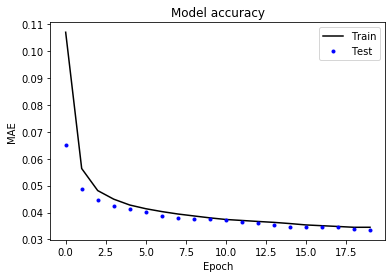

Train - Error in prediction went down from 0.10689999908208847 to 0.03449999913573265
Test  - Error in prediction went down from 0.065 to 0.0335 



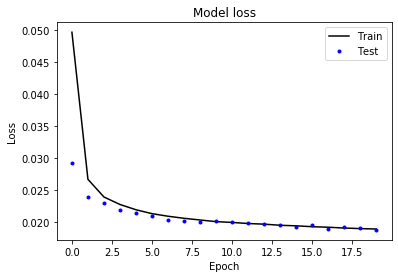

10000/10000 [==============================] - 0s 21us/step


[0.018756979874521493, 0.033547643572092056]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'mse', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 20) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 2
### Optimizer: Adam
### Loss: MSE
### Architecture: 4, 8, 10

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0457 - mae: 0.0997 - val_loss: 0.0279 - val_mae: 0.0616
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0261 - mae: 0.0558 - val_loss: 0.0245 - val_mae: 0.0510
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0237 - mae: 0.0484 - val_loss: 0.0229 - val_mae: 0.0460
Epoch 4/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.0224 - mae: 0.0446 - val_loss: 0.0219 - val_mae: 0.0433
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0214 - mae: 0.0422 - val_loss: 0.0216 - val_mae: 0.0420
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0208 - mae: 0.0407 - val_loss: 0.0207 - val_mae: 0.0392
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0202 - mae: 0.0395 - val_loss: 0.0216 - val_mae

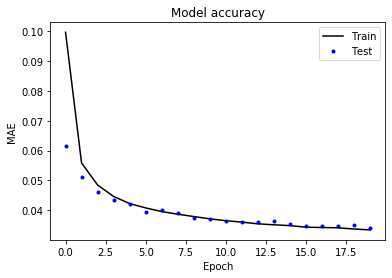

Train - Error in prediction went down from 0.09969999641180038 to 0.033399999141693115
Test  - Error in prediction went down from 0.0616 to 0.0341 



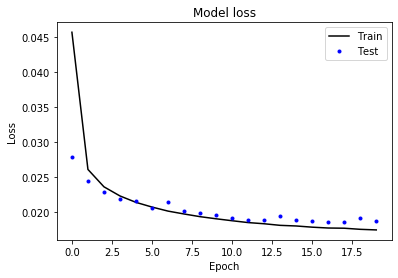

10000/10000 [==============================] - 0s 20us/step


[0.018763381543848663, 0.03413324058055878]

In [0]:
model = Sequential() 
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', 
              loss = 'mse', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 20) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 3
### Optimizer: RMSProp
### Loss: MAE
### Metric: MAE

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1019 - mae: 0.1019 - val_loss: 0.0748 - val_mae: 0.0748
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0698 - mae: 0.0698 - val_loss: 0.0669 - val_mae: 0.0669
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0639 - mae: 0.0639 - val_loss: 0.0608 - val_mae: 0.0608
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0598 - mae: 0.0598 - val_loss: 0.0577 - val_mae: 0.0577
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0573 - mae: 0.0573 - val_loss: 0.0563 - val_mae: 0.0563
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0557 - mae: 0.0557 - val_loss: 0.0551 - val_mae: 0.0551
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0545 - mae: 0.0545 - val_loss: 0.0538 - val_mae

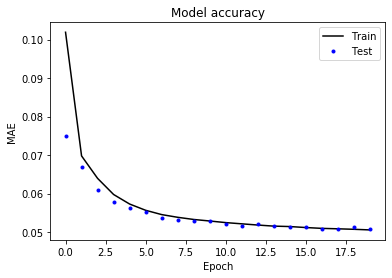

Train - Error in prediction went down from 0.10189999639987946 to 0.050599999725818634
Test  - Error in prediction went down from 0.0748 to 0.0509 



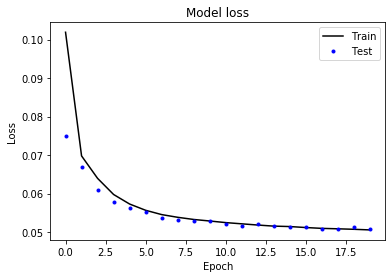

10000/10000 [==============================] - 0s 23us/step


[0.05088318316936493, 0.05088319256901741]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'mae', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 20) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 4
### Optimizer: Adam
### Loss: MAE
### Architecture: 4, 8, 10

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1028 - mae: 0.1028 - val_loss: 0.0885 - val_mae: 0.0885
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0888 - mae: 0.0888 - val_loss: 0.0870 - val_mae: 0.0870
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0873 - mae: 0.0873 - val_loss: 0.0856 - val_mae: 0.0856
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0865 - mae: 0.0865 - val_loss: 0.0856 - val_mae: 0.0856
Epoch 5/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0861 - mae: 0.0861 - val_loss: 0.0851 - val_mae: 0.0851
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0856 - mae: 0.0856 - val_loss: 0.0850 - val_mae: 0.0850
Epoch 7/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.0854 - mae: 0.0854 - val_loss: 0.0845 - val_mae

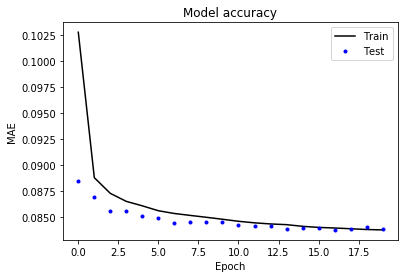

Train - Error in prediction went down from 0.10279999673366547 to 0.08380000293254852
Test  - Error in prediction went down from 0.0885 to 0.0839 



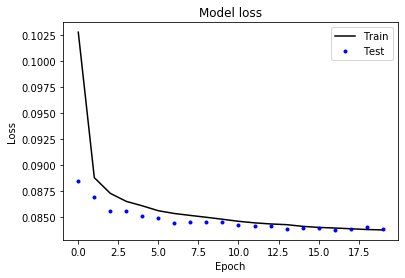

10000/10000 [==============================] - 0s 24us/step


[0.08387244645357132, 0.0838724672794342]

In [0]:
model = Sequential()  
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', 
              loss = 'mae', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 20) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 5
### Optimizer: RMSProp
### Loss: MSE
### Layers: 4, 8, 8, 10

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0499 - mae: 0.1061 - val_loss: 0.0321 - val_mae: 0.0668
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0267 - mae: 0.0558 - val_loss: 0.0235 - val_mae: 0.0480
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0233 - mae: 0.0465 - val_loss: 0.0219 - val_mae: 0.0425
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0219 - mae: 0.0432 - val_loss: 0.0212 - val_mae: 0.0414
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0210 - mae: 0.0410 - val_loss: 0.0204 - val_mae: 0.0394
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0203 - mae: 0.0392 - val_loss: 0.0199 - val_mae: 0.0382
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0198 - mae: 0.0382 - val_loss: 0.0198 - val_mae

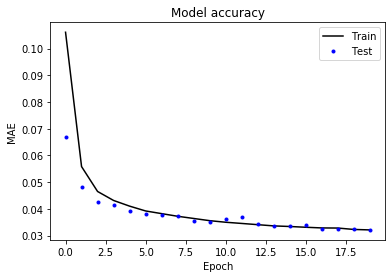

Train - Error in prediction went down from 0.10610000044107437 to 0.032099999487400055
Test  - Error in prediction went down from 0.0668 to 0.0322 



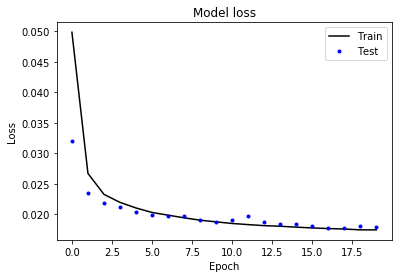

10000/10000 [==============================] - 0s 21us/step


[0.01785473294274416, 0.03222126141190529]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'mse', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 20) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 6
### Optimizer: RMSProp
### Loss: MSE
### Layers: 4, 8, 8, 8, 10

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0551 - mae: 0.1159 - val_loss: 0.0368 - val_mae: 0.0771
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0316 - mae: 0.0650 - val_loss: 0.0272 - val_mae: 0.0547
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0266 - mae: 0.0523 - val_loss: 0.0247 - val_mae: 0.0483
Epoch 4/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0249 - mae: 0.0481 - val_loss: 0.0246 - val_mae: 0.0460
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0239 - mae: 0.0462 - val_loss: 0.0235 - val_mae: 0.0458
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0233 - mae: 0.0454 - val_loss: 0.0232 - val_mae: 0.0443
Epoch 7/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0229 - mae: 0.0445 - val_loss: 0.0231 - val_mae

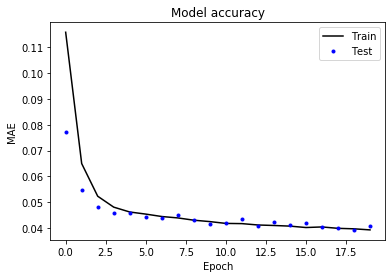

Train - Error in prediction went down from 0.11590000241994858 to 0.03929999843239784
Test  - Error in prediction went down from 0.0771 to 0.0406 



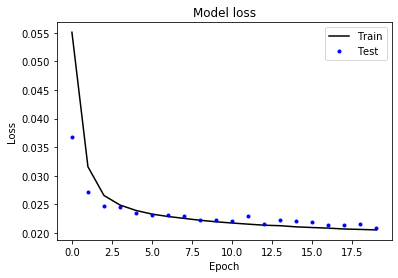

10000/10000 [==============================] - 0s 23us/step


[0.020917654862534253, 0.040612995624542236]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'mse', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 20) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 7
### Optimizer: RMSProp
### Loss: MSE
### Layers: 4, 16, 16, 10

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0395 - mae: 0.0843 - val_loss: 0.0236 - val_mae: 0.0493
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0224 - mae: 0.0450 - val_loss: 0.0205 - val_mae: 0.0395
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0202 - mae: 0.0395 - val_loss: 0.0197 - val_mae: 0.0372
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0190 - mae: 0.0365 - val_loss: 0.0187 - val_mae: 0.0356
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0183 - mae: 0.0348 - val_loss: 0.0192 - val_mae: 0.0345
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0180 - mae: 0.0336 - val_loss: 0.0187 - val_mae: 0.0337
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0177 - mae: 0.0328 - val_loss: 0.0178 - val_mae

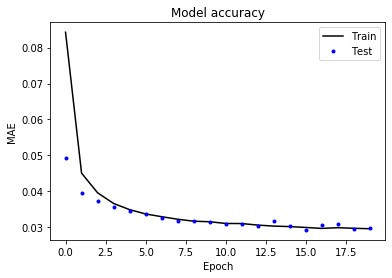

Train - Error in prediction went down from 0.08429999649524689 to 0.029500000178813934
Test  - Error in prediction went down from 0.0493 to 0.0298 



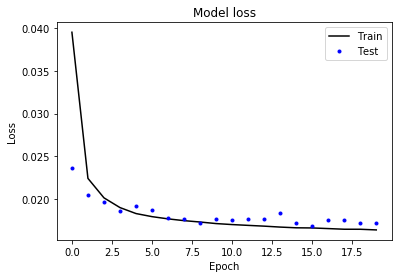

10000/10000 [==============================] - 0s 22us/step


[0.017275968905049375, 0.02979354001581669]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'mse', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 20) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 8
### Optimizer: RMSProp
### Loss: MSE
### Layers: 4, 32, 32, 10

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0347 - mae: 0.0734 - val_loss: 0.0254 - val_mae: 0.0507
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0246 - mae: 0.0483 - val_loss: 0.0223 - val_mae: 0.0436
Epoch 3/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0231 - mae: 0.0449 - val_loss: 0.0214 - val_mae: 0.0419
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0221 - mae: 0.0426 - val_loss: 0.0211 - val_mae: 0.0407
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0212 - mae: 0.0410 - val_loss: 0.0201 - val_mae: 0.0388
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0204 - mae: 0.0392 - val_loss: 0.0197 - val_mae: 0.0379
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0200 - mae: 0.0382 - val_loss: 0.0194 - val_mae

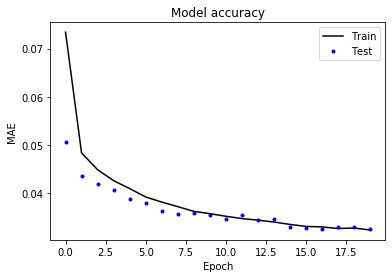

Train - Error in prediction went down from 0.07339999824762344 to 0.03240000084042549
Test  - Error in prediction went down from 0.0507 to 0.0325 



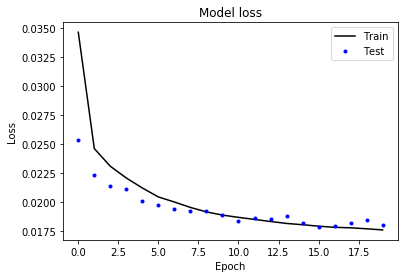

10000/10000 [==============================] - 0s 22us/step


[0.018004356398340315, 0.032514575868844986]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'mse', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 20) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 9
### Optimizer: RMSProp
### Loss: MSE
### Layers: 4, 16, 16, 10
### Epochs: 40

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 63us/step - loss: 0.0401 - mae: 0.0867 - val_loss: 0.0239 - val_mae: 0.0506
Epoch 2/40
60000/60000 [==============================] - 4s 68us/step - loss: 0.0235 - mae: 0.0474 - val_loss: 0.0209 - val_mae: 0.0419
Epoch 3/40
60000/60000 [==============================] - 3s 57us/step - loss: 0.0216 - mae: 0.0425 - val_loss: 0.0203 - val_mae: 0.0394
Epoch 4/40
60000/60000 [==============================] - 3s 54us/step - loss: 0.0205 - mae: 0.0399 - val_loss: 0.0194 - val_mae: 0.0377
Epoch 5/40
60000/60000 [==============================] - 3s 56us/step - loss: 0.0196 - mae: 0.0380 - val_loss: 0.0184 - val_mae: 0.0357
Epoch 6/40
60000/60000 [==============================] - 3s 56us/step - loss: 0.0191 - mae: 0.0366 - val_loss: 0.0188 - val_mae: 0.0345
Epoch 7/40
60000/60000 [==============================] - 3s 53us/step - loss: 0.0187 - mae: 0.0354 - val_loss: 0.0185 - val_mae

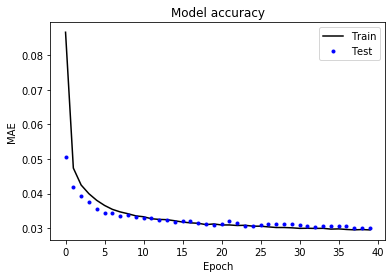

Train - Error in prediction went down from 0.08669999986886978 to 0.029500000178813934
Test  - Error in prediction went down from 0.0506 to 0.03 



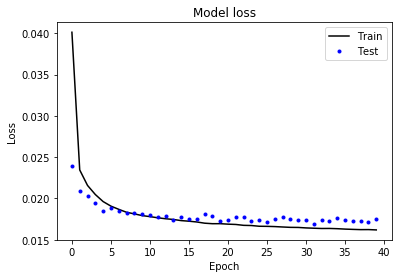

10000/10000 [==============================] - 0s 21us/step


[0.017450369797647, 0.030042577534914017]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'mse', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 40) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)

# Model 10
### Optimizer: RMSProp
### Loss: MSE
### Layers: 4, 16, 16, 10
### Epochs: 30

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0417 - mae: 0.0883 - val_loss: 0.0288 - val_mae: 0.0588
Epoch 2/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.0265 - mae: 0.0531 - val_loss: 0.0236 - val_mae: 0.0470
Epoch 3/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.0233 - mae: 0.0459 - val_loss: 0.0217 - val_mae: 0.0427
Epoch 4/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0217 - mae: 0.0423 - val_loss: 0.0204 - val_mae: 0.0392
Epoch 5/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0208 - mae: 0.0397 - val_loss: 0.0200 - val_mae: 0.0377
Epoch 6/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.0202 - mae: 0.0382 - val_loss: 0.0196 - val_mae: 0.0368
Epoch 7/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.0197 - mae: 0.0371 - val_loss: 0.0196 - val_mae

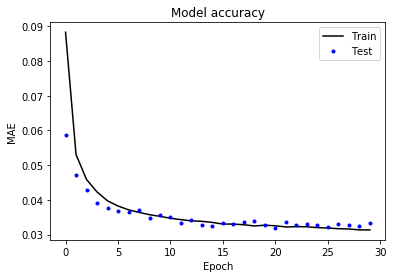

Train - Error in prediction went down from 0.08829999715089798 to 0.031300000846385956
Test  - Error in prediction went down from 0.0588 to 0.0333 



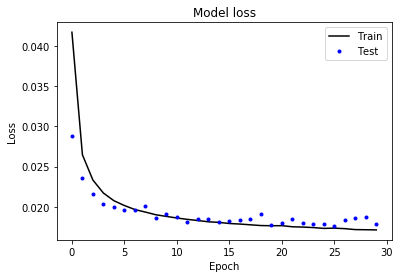

10000/10000 [==============================] - 0s 22us/step


[0.01791270460258238, 0.03332490473985672]

In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', 
              loss = 'mse', 
              metrics = ['mae'])

history = model.fit(X_train, Y_train, 
                    verbose = 1, 
                    validation_data = (X_test, Y_test),
                    shuffle = True,
                    epochs = 30) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0], 4)
v2 = round(history.history['mae'][-1], 4)
v3 = round(history.history['val_mae'][0], 4)
v4 = round(history.history['val_mae'][-1], 4)
print("Train - Error in prediction went down from {} to {}".format(v1, v2))
print("Test  - Error in prediction went down from {} to {}".format(v3, v4), "\n")



# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Model evaluation
model.evaluate(X_test, Y_test)